### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

### Importing the data

In [2]:
data=pd.read_csv('../data/train_cleaned.csv',)
data.head()

,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,importance1,importance2,score1,...,Team2__Western Sydney FC,Team2__Western United,Team2__Willem II,Team2__Wolfsberger AC,Team2__Wolverhampton,Team2__Wuhan Zall,Team2__Wycombe Wanderers,Team2__Würzburger Kickers,Team2__Young Boys,Team2__Zenit St Petersburg
0,48.22,37.83,0.5755,0.1740,0.2505,1.75,0.84,45.9,22.1,1.0,...,0,0,0,0,0,0,0,0,0,0
1,39.81,60.08,0.2387,0.5203,0.2410,1.22,1.89,25.6,63.4,0.0,...,0,0,0,0,0,0,0,0,0,0
2,65.59,39.99,0.7832,0.0673,0.1495,2.58,0.62,77.1,28.8,3.0,...,0,0,0,0,0,0,0,0,0,0
3,32.25,54.82,0.2276,0.5226,0.2498,1.10,1.79,35.8,58.9,0.0,...,0,0,0,0,0,0,0,0,0,0
4,38.24,40.45,0.4403,0.2932,0.2665,1.57,1.24,26.2,21.3,2.0,...,0,0,0,0,0,0,0,0,0,0


#### Segregating variables: Independent and Dependent Variables

In [3]:
X=data.drop(columns=['score1','score2'],axis=1)
Y1=data.score1
Y2=data.score2

In [4]:
##Importing the train test split function
from sklearn.model_selection import train_test_split
train_X1,test_X1,train_Y1,test_Y1 = train_test_split(X,Y1, random_state = 56)
train_X2,test_X2,train_Y2,test_Y2 = train_test_split(X,Y2, random_state = 56)

In [5]:
#we will get the same shape for train_X2, test_X2
train_X1.shape,test_X1.shape

((1343, 765), (448, 765))

In [6]:
train_Y1.shape,test_Y1.shape

((1343,), (448,))

### 1. Implementing Linear Regression

#### Score1

In [7]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [8]:
lr = LR(normalize=True)
lr.fit(train_X1,train_Y1)
y_pred_1=lr.predict(test_X1)
print('Linear Regression model Accuracy is: '+str(lr.score(test_X1,test_Y1)*100))

Linear Regression model Accuracy is: 97.06915598937836


In [9]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_X1)
k = mse(train_predict, train_Y1)
print('Training Mean Squared Error', k )

Training Mean Squared Error 1.0557449586699016e-29


In [10]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_X1)
k = mse(test_predict, test_Y1)
print('Test Mean Squared Error', k )

Test Mean Squared Error 0.04356487939337396


We can observe that there is not much significant  deviation between Train error and Test error

#### Score2

In [11]:
lr = LR(normalize=True)
lr.fit(train_X2,train_Y2)
y_pred_2=lr.predict(test_X1)
print('Linear Regression model Accuracy is: '+str(lr.score(test_X2,test_Y2)*100))

Linear Regression model Accuracy is: 98.94831606350198


In [12]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_X2)
k = mse(train_predict, train_Y2)
print('Training Mean Squared Error', k )

Training Mean Squared Error 4.1440755487443436e-30


In [13]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_X2)
k = mse(test_predict, test_Y2)
print('Test Mean Squared Error', k )

Test Mean Squared Error 0.014671720318663272


We observe that mean squared error is significantly low on Test as compared to Train, In the same way we can calculate mean absolute error

### Model Interpretability

Linear Regression assumes lot of things, some of these are <br>
1.Linear relationship(which we evaluated while feature engineering)<br>
2.There shouldn't be any correlation between error terms<br>
3.Residuals must have constant variance <br>
4.Multi collinearity between independent variabels shouldn't be there, it works but model is volatile( We can use VIF to check these where we calculate the R-square value)<br>
5.If we get a good model, R-square value is less

In [14]:
# Arranging and calculating the Residuals for score1
residuals = pd.DataFrame({
    'fitted values' : test_Y1,
    'predicted values' : y_pred_1,
})

residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']
residuals.head()

,fitted values,predicted values,residuals
1210,1.0,1.000000,1.332268e-15
1782,2.0,1.885431,1.145686e-01
816,1.0,1.000000,3.552714e-15
1163,2.0,2.000000,3.774758e-15
153,1.0,1.000000,-2.664535e-15


In [15]:
residuals.shape

(448, 3)

### Plotting residual curve (Is there constant Variance)

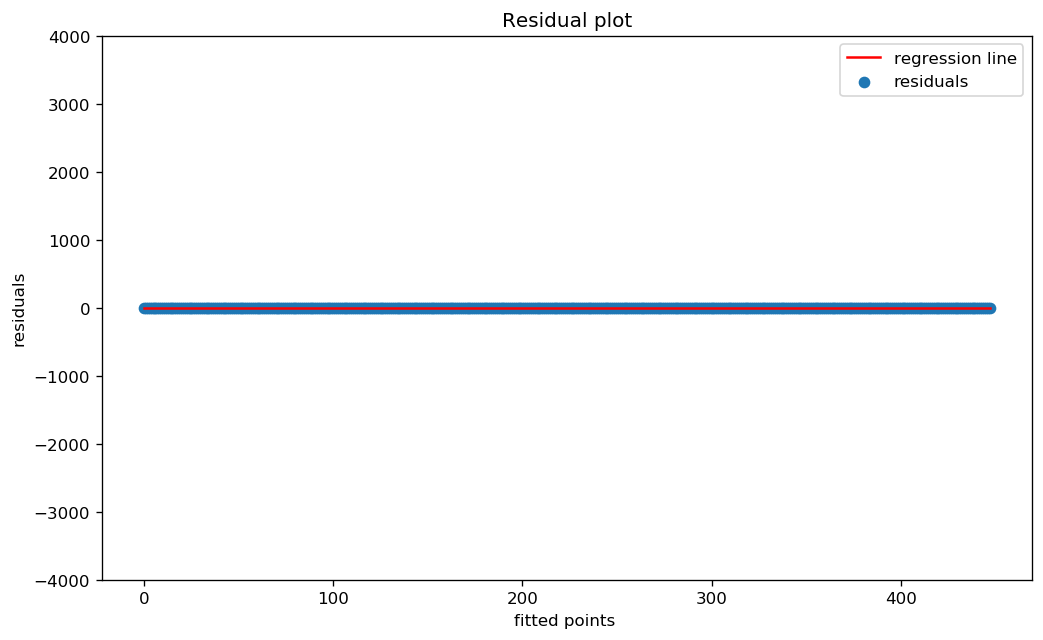

In [16]:
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
f = range(0,448)
k = [0 for i in range(0,448)]
plt.scatter( f, residuals.residuals[:], label = 'residuals')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('fitted points ')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.ylim(-4000, 4000)
plt.legend()

The Residual plot clearly Looks Constant, i.e. the the variance of the error across the dataset is nearly constant.

### Checking Distribution of Residuals

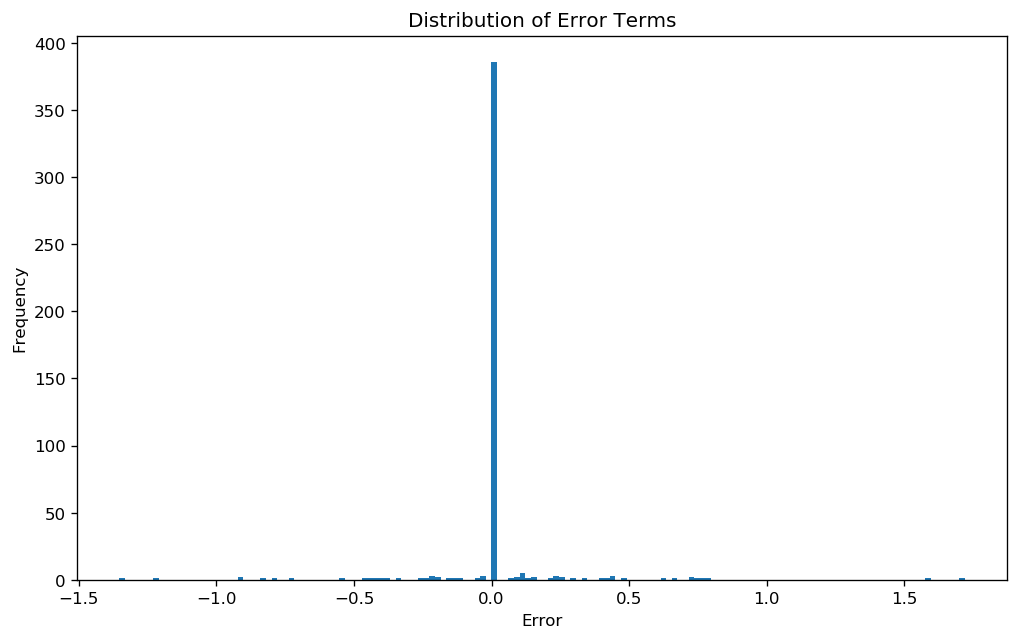

In [17]:
# Histogram for distribution
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
plt.hist(residuals.residuals, bins = 150)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Error Terms')
plt.show()

Distribution is nearly normal, there are some outliers though, We can use th <b>Q-Q</b> plot to validate this

### 2. RandomForest Regressor

In [21]:
#for score1
from sklearn.ensemble import RandomForestRegressor
RM=RandomForestRegressor(random_state=4)
RM.fit(train_X1,train_Y1)
y_pred_r1=RM.predict(test_X1)
RM.score(test_X1,test_Y1)
print('Random Forest Regressor model Accuracy is: '+str(RM.score(test_X1,test_Y1)*100))

Random Forest Regressor model Accuracy is: 99.62427899119102


In [22]:
#for score2
from sklearn.ensemble import RandomForestRegressor
RM=RandomForestRegressor(random_state=4)
RM.fit(train_X2,train_Y2)
y_pred_r2=RM.predict(test_X2)
RM.score(test_X2,test_Y2)
print('Random Forest Regressor model Accuracy is: '+str(RM.score(test_X2,test_Y2)*100))

Random Forest Regressor model Accuracy is: 99.75890855583651


In [23]:
#calculating mean absolute error for Randomforest regressor for score1
print("Mean_Absolute_error:",str(mae(y_pred_r1,test_Y1)))

Mean_Absolute_error: 0.00544642857142857


In [24]:
#calculating mean absolute error for Randomforest regressor for score2
print("Mean_Absolute_error:",str(mae(y_pred_r2,test_Y2)))

Mean_Absolute_error: 0.005937500000000003


### Conclusion

We were able to get accurate models using Linear regression and Random forest Regression, Linear regression model is interpreted and some of the assumptions are validated with respect to all the features, I tried to calcluate Variance inflation factor for Linear regression but there were some errors while implementing it.<br>

Mean absolute error and mean sqaured error are quite low especially for random forest regression and overall we can conlude it's a better model